In [12]:
%load_ext autoreload
%autoreload 2
import torch.optim as optim
import torch
import wget
import random
import Prediction
from model import *
from Features import Imageloader as I
from Features import Preprocessing as P
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
wget.download('https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf') 
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
mpl.rc('font', family='Sarabun')

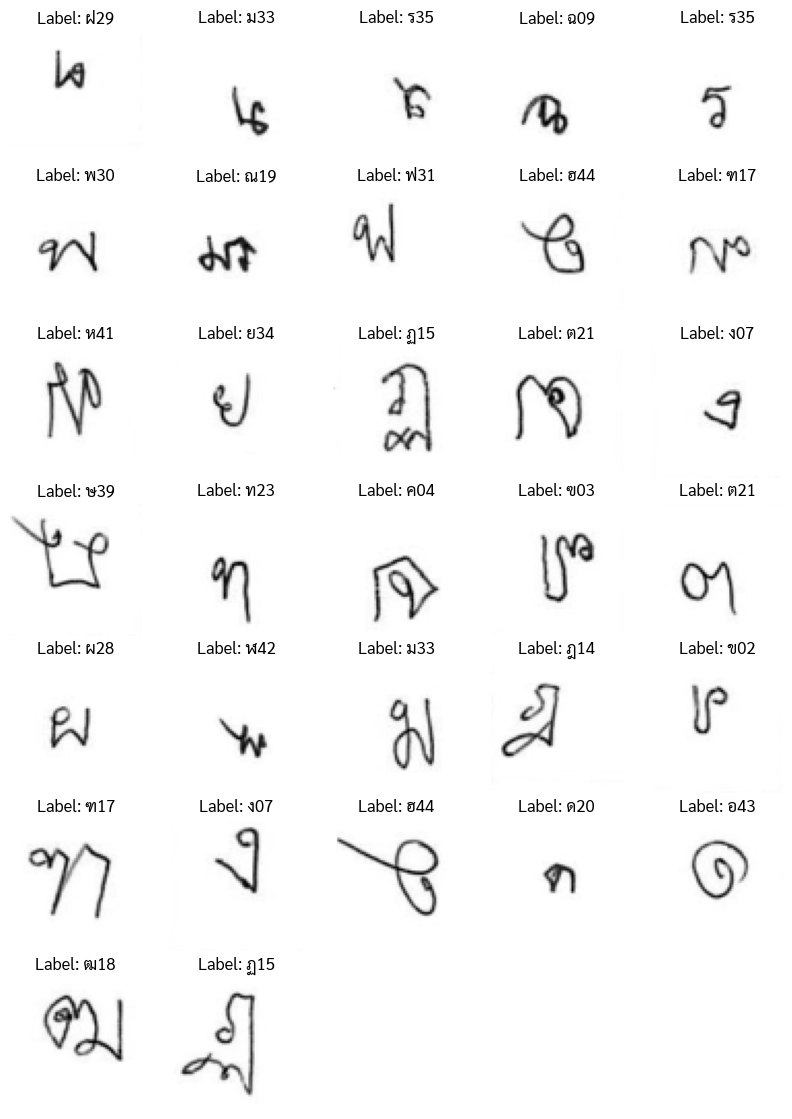

In [14]:
dataset = iter(I.train_loaderThai)
images,labels = next(dataset)
I.show_images(images,labels,I.classnamesThai)


In [9]:
for batch in I.train_loader:
    images, labels = batch
    print(images.shape)  # Print the shape of the batch of images
    print(labels.shape)  # Print the shape of the batch of labels
    break  # Print only the first batch

torch.Size([32, 1, 64, 64])
torch.Size([32])


In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Select GPU
print("Device:",'cuda' if torch.cuda.is_available() else 'cpu')
num_feature = 64 *64 *64
model = Model.OCRModel(num_feature=num_feature)
model = model.to(device)  # Move model to the GPU (if available)
optimizer = optim.Adam(model.parameters(), lr=0.001)
ctc_loss =Model.ctc_loss

Device: cuda


# ENG 

In [ ]:
# Train and Val
train_lossENG,val_lossENG = Train.train_and_validate(model=model,train_loader=I.train_loaderENG,val_loader=I.val_loaderENG,optimizer=optimizer,criterion=ctc_loss,device=device,num_epochs=30)

Epoch 1/30, Train Loss: 0.9442, Val Loss: 0.3677
Epoch 2/30, Train Loss: 0.5211, Val Loss: 0.3218
Epoch 3/30, Train Loss: 0.4192, Val Loss: 0.1966
Epoch 4/30, Train Loss: 0.3554, Val Loss: 0.2147
Epoch 5/30, Train Loss: 0.3115, Val Loss: 0.2530
Epoch 6/30, Train Loss: 0.2753, Val Loss: 0.1572
Epoch 7/30, Train Loss: 0.2486, Val Loss: 0.1641
Epoch 8/30, Train Loss: 0.2251, Val Loss: 0.1910
Epoch 9/30, Train Loss: 0.2063, Val Loss: 0.1035
Epoch 10/30, Train Loss: 0.1913, Val Loss: 0.1496
Epoch 11/30, Train Loss: 0.1789, Val Loss: 0.0981
Epoch 12/30, Train Loss: 0.1660, Val Loss: 0.1355
Epoch 13/30, Train Loss: 0.1570, Val Loss: 0.0486
Epoch 14/30, Train Loss: 0.1485, Val Loss: 0.0787
Epoch 15/30, Train Loss: 0.1410, Val Loss: 0.1001
Epoch 16/30, Train Loss: 0.1325, Val Loss: 0.0862
Epoch 17/30, Train Loss: 0.1278, Val Loss: 0.0692
Epoch 18/30, Train Loss: 0.1221, Val Loss: 0.0632
Epoch 19/30, Train Loss: 0.1149, Val Loss: 0.0696
Epoch 20/30, Train Loss: 0.1105, Val Loss: 0.0639
Epoch 21/

In [16]:
plotting.plot_loss(train_losses=train_lossENG,val_losses=val_lossENG)

NameError: name 'train_lossENG' is not defined

In [ ]:
#train Model
Train.train(model=model,train_loader=I.train_loader,optimizer=optimizer,ctc_loss=ctc_loss,device=device,num_epochs=30)

In [ ]:
#Validate Model
Validate.validate(model=model,val_loader=I.val_loader,criterion=ctc_loss,device=device)

In [ ]:
#Test Model
Test.test(model=model,device=device,test_loader=I.test_loaderENG,criterion=ctc_loss)

Test Loss: 0.0620, Test Accuracy: 98.06%


# Thai

In [17]:
# Train and Val
train_lossThai,val_lossThai = Train.train_and_validate(model=model,train_loader=I.train_loaderThai,val_loader=I.val_loaderThai,optimizer=optimizer,criterion=ctc_loss,device=device,num_epochs=30)

Epoch 1/30, Train Loss: 3.8824, Val Loss: 4.1571
Epoch 2/30, Train Loss: 3.4692, Val Loss: 3.9243
Epoch 3/30, Train Loss: 3.1591, Val Loss: 4.3983
Epoch 4/30, Train Loss: 2.8547, Val Loss: 4.1832
Epoch 5/30, Train Loss: 2.5180, Val Loss: 2.8709
Epoch 6/30, Train Loss: 2.1803, Val Loss: 4.7714
Epoch 7/30, Train Loss: 1.8505, Val Loss: 2.6831
Epoch 8/30, Train Loss: 1.6097, Val Loss: 2.3065
Epoch 9/30, Train Loss: 1.3222, Val Loss: 2.2517
Epoch 10/30, Train Loss: 1.1317, Val Loss: 2.4467
Epoch 11/30, Train Loss: 0.9819, Val Loss: 2.2536
Epoch 12/30, Train Loss: 0.8557, Val Loss: 2.7047
Epoch 13/30, Train Loss: 0.7053, Val Loss: 1.8838
Epoch 14/30, Train Loss: 0.5556, Val Loss: 2.1756
Epoch 15/30, Train Loss: 0.5007, Val Loss: 2.3607
Epoch 16/30, Train Loss: 0.4743, Val Loss: 2.0337
Epoch 17/30, Train Loss: 0.3726, Val Loss: 1.6993
Epoch 18/30, Train Loss: 0.2738, Val Loss: 2.0573
Epoch 19/30, Train Loss: 0.1974, Val Loss: 1.6923
Epoch 20/30, Train Loss: 0.1592, Val Loss: 1.8974
Epoch 21/

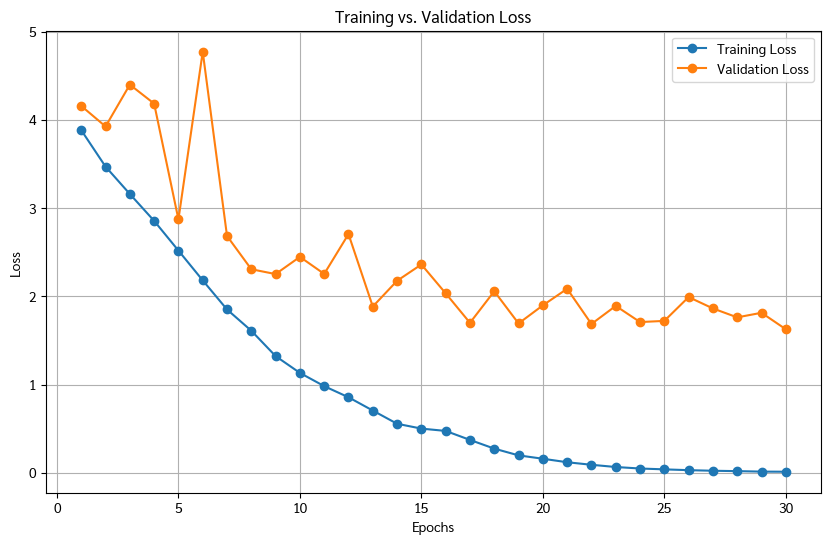

In [18]:
plotting.plot_loss(train_losses=train_lossThai,val_losses=val_lossThai)

In [19]:
#Test Model
Test.test(model=model,device=device,test_loader=I.test_loaderThai,criterion=ctc_loss)

Test Loss: 1.5252, Test Accuracy: 52.68%


# Save Model

In [20]:
#Save Model
torch.save(model.state_dict(),"THAIOCR.pth")

# Predict 

In [22]:
path = os.listdir("SampleIMG")
path = [os.path.join("SampleIMG", item) for item in path]
random.shuffle(path)

e:\CODE\Image Processing\Image-Processing-Project-\Prediction.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(OCR))


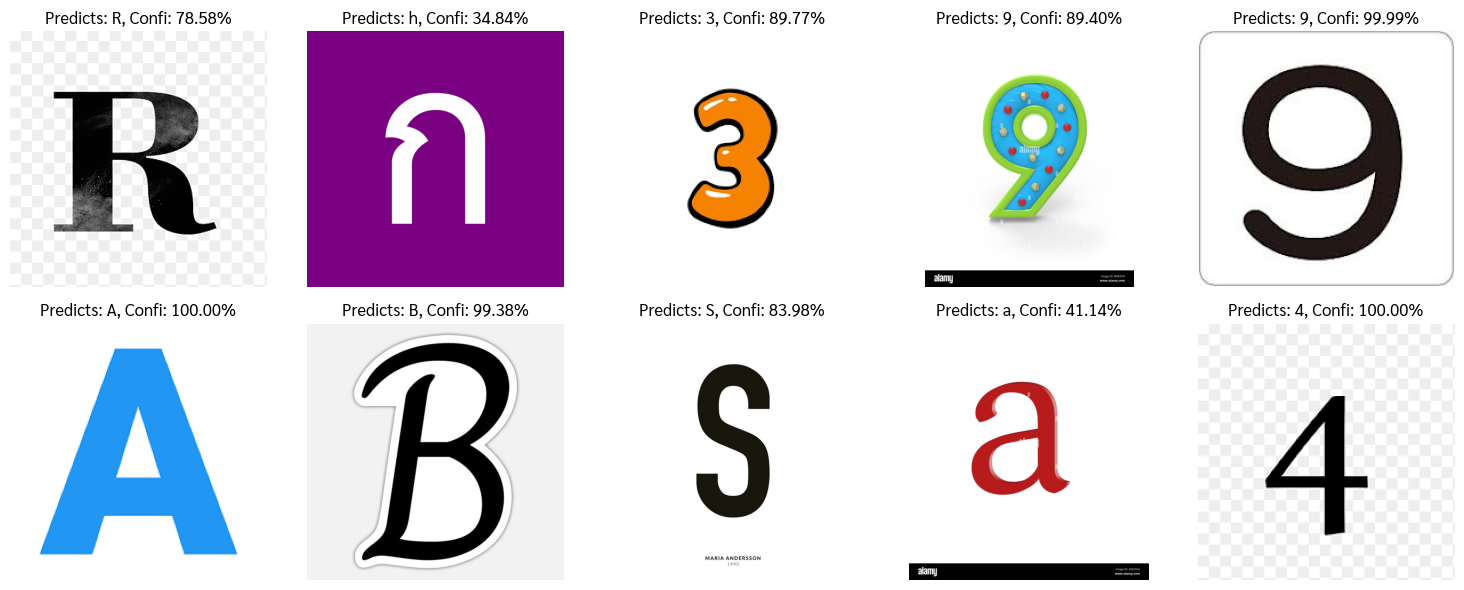

In [27]:
Prediction.predict(model=model,device=device,image_paths=path,transform=P.preprocessing_pipeline,num_feature=num_feature,OCR="ENGOCR.pth",THAI=False)